In [57]:
# set up
import pandas as pd
import datetime
from sqlalchemy import create_engine

In [58]:
engine = create_engine("sqlite:////Users/joshua.claxton/Documents/Metis_projects/project_1/data/mta.db")
all_data = pd.read_sql('SELECT * FROM mta_data;', engine)

In [59]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664249 entries, 0 to 2664248
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 223.6+ MB


In [60]:
# Three months of data
all_data.DATE.value_counts().sort_index()

03/06/2021        1
03/30/2019    28919
03/31/2019    28944
04/01/2019    29152
04/02/2019    28975
              ...  
06/24/2019    29479
06/25/2019    29437
06/26/2019    29417
06/27/2019    29464
06/28/2019    29779
Name: DATE, Length: 92, dtype: int64

In [61]:
# Drop test row from initial db set up from command line
all_data = all_data[all_data.DATE != "03/06/2021"]
all_data.DATE.value_counts().sort_index()


03/30/2019    28919
03/31/2019    28944
04/01/2019    29152
04/02/2019    28975
04/03/2019    29104
              ...  
06/24/2019    29479
06/25/2019    29437
06/26/2019    29417
06/27/2019    29464
06/28/2019    29779
Name: DATE, Length: 91, dtype: int64

In [62]:
# Turn dataframe into a time series
all_data["DATE_TIME"] = pd.to_datetime(all_data.DATE + " " + all_data.TIME, format="%m/%d/%Y %H:%M:%S")

In [63]:
# Confirm "C/A", "UNIT", "SCP", "STATION", and "DATE_TIME" uniquely identify the data
(all_data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)


,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
626289,N045,R187,01-00-00,81 ST-MUSEUM,2019-06-01 17:00:00,2
2178082,R283,R221,00-00-00,167 ST,2019-04-16 04:00:00,2
384181,G009,R151,02-00-04,CONEY IS-STILLW,2019-05-16 17:00:00,2
1749648,R133,R272,00-00-00,28 ST,2019-04-09 13:00:00,2
626294,N045,R187,01-00-00,81 ST-MUSEUM,2019-06-02 17:00:00,2


In [64]:
#counts_of_entries= (all_data
 #.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 #.ENTRIES.count()
 #.reset_index()
 #.sort_values("ENTRIES", ascending=False)).head(5)
#counts_of_entries.head()

In [65]:
# Get rid of the duplicate entry
all_data.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
all_data.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [66]:
(all_data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-03-30 00:00:00,1
1776141,R141,R031,00-06-00,34 ST-PENN STA,2019-03-31 12:00:00,1
1776123,R141,R031,00-03-04,34 ST-PENN STA,2019-06-27 12:00:00,1
1776124,R141,R031,00-03-04,34 ST-PENN STA,2019-06-27 16:00:00,1
1776125,R141,R031,00-03-04,34 ST-PENN STA,2019-06-27 20:00:00,1


In [67]:
all_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
2664247,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,21:00:00,REGULAR,5554,379,2019-06-28 21:00:00
2664246,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,17:00:00,REGULAR,5554,379,2019-06-28 17:00:00
2664245,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,13:00:00,REGULAR,5554,379,2019-06-28 13:00:00
2664244,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,09:00:00,REGULAR,5554,379,2019-06-28 09:00:00
2664243,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,05:00:00,REGULAR,5554,379,2019-06-28 05:00:00


In [68]:
all_data = all_data.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [69]:
mask = all_data["STATION"] == "CANAL ST"

In [70]:
all_data[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
2591497,R120,R320,01-00-02,CANAL ST,1,IRT,06/28/2019,21:00:00,1404990,2019-06-28 21:00:00
2591496,R120,R320,01-00-02,CANAL ST,1,IRT,06/28/2019,17:00:00,1404834,2019-06-28 17:00:00
2591495,R120,R320,01-00-02,CANAL ST,1,IRT,06/28/2019,13:00:00,1404736,2019-06-28 13:00:00
2591494,R120,R320,01-00-02,CANAL ST,1,IRT,06/28/2019,09:00:00,1404674,2019-06-28 09:00:00
2591493,R120,R320,01-00-02,CANAL ST,1,IRT,06/28/2019,05:00:00,1404655,2019-06-28 05:00:00


In [71]:
turnstiles_daily = (all_data
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [72]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,03/30/2019,6999796
1,A002,R051,02-00-00,59 ST,03/31/2019,7000433
2,A002,R051,02-00-00,59 ST,04/01/2019,7001895
3,A002,R051,02-00-00,59 ST,04/02/2019,7003466
4,A002,R051,02-00-00,59 ST,04/03/2019,7005109


In [73]:
BK_data = turnstiles_daily[(turnstiles_daily["STATION"] == "JAY ST-METROTEC")| (turnstiles_daily["STATION"] == "NOSTRAND AV")|(turnstiles_daily["STATION"] == "SUTTER AV")|(turnstiles_daily["STATION"] == "NEVINS ST")|(turnstiles_daily["STATION"] == "UTICA AV")]
BK_data["STATION"].unique()
BK_data.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
41947,C003,R089,00-00-00,JAY ST-METROTEC,03/30/2019,11649864
41948,C003,R089,00-00-00,JAY ST-METROTEC,03/31/2019,11650134
41949,C003,R089,00-00-00,JAY ST-METROTEC,04/01/2019,11651021
41950,C003,R089,00-00-00,JAY ST-METROTEC,04/02/2019,11651984
41951,C003,R089,00-00-00,JAY ST-METROTEC,04/03/2019,11652943


In [74]:
BK_data[["PREV_DATE", "PREV_ENTRIES"]] = (BK_data
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-74-9144ec2204a9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  BK_data[["PREV_DATE", "PREV_ENTRIES"]] = (BK_data
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [75]:
BK_data.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
41947,C003,R089,00-00-00,JAY ST-METROTEC,03/30/2019,11649864,NaN,NaN
41948,C003,R089,00-00-00,JAY ST-METROTEC,03/31/2019,11650134,03/30/2019,11649864.0
41949,C003,R089,00-00-00,JAY ST-METROTEC,04/01/2019,11651021,03/31/2019,11650134.0
41950,C003,R089,00-00-00,JAY ST-METROTEC,04/02/2019,11651984,04/01/2019,11651021.0
41951,C003,R089,00-00-00,JAY ST-METROTEC,04/03/2019,11652943,04/02/2019,11651984.0


In [76]:
BK_data.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

<ipython-input-76-5391968c9378>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BK_data.dropna(subset=["PREV_DATE"], axis=0, inplace=True)


In [77]:
BK_data.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
41948,C003,R089,00-00-00,JAY ST-METROTEC,03/31/2019,11650134,03/30/2019,11649864.0
41949,C003,R089,00-00-00,JAY ST-METROTEC,04/01/2019,11651021,03/31/2019,11650134.0
41950,C003,R089,00-00-00,JAY ST-METROTEC,04/02/2019,11651984,04/01/2019,11651021.0
41951,C003,R089,00-00-00,JAY ST-METROTEC,04/03/2019,11652943,04/02/2019,11651984.0
41952,C003,R089,00-00-00,JAY ST-METROTEC,04/04/2019,11653985,04/03/2019,11652943.0


In [78]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
BK_data["DAILY_ENTRIES"] = BK_data.apply(get_daily_counts, axis=1, max_counter=1000000)

1435 4762350.0
459139 1619233.0
1077 10993087.0


<ipython-input-78-8c8914a2868c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BK_data["DAILY_ENTRIES"] = BK_data.apply(get_daily_counts, axis=1, max_counter=1000000)


In [79]:
BK_data.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
41948,C003,R089,00-00-00,JAY ST-METROTEC,03/31/2019,11650134,03/30/2019,11649864.0,270.0
41949,C003,R089,00-00-00,JAY ST-METROTEC,04/01/2019,11651021,03/31/2019,11650134.0,887.0
41950,C003,R089,00-00-00,JAY ST-METROTEC,04/02/2019,11651984,04/01/2019,11651021.0,963.0
41951,C003,R089,00-00-00,JAY ST-METROTEC,04/03/2019,11652943,04/02/2019,11651984.0,959.0
41952,C003,R089,00-00-00,JAY ST-METROTEC,04/04/2019,11653985,04/03/2019,11652943.0,1042.0


In [80]:
ca_unit_station_daily = BK_data.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()

In [81]:
station_daily = BK_data.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()

In [82]:
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,JAY ST-METROTEC,03/31/2019,13118.0
1,JAY ST-METROTEC,04/01/2019,43375.0
2,JAY ST-METROTEC,04/02/2019,47547.0
3,JAY ST-METROTEC,04/03/2019,48491.0
4,JAY ST-METROTEC,04/04/2019,48962.0


In [83]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [89]:
station_daily.sort_values(by=['DAILY_ENTRIES'],ascending=False)

station_daily = station_daily[station_daily['DAILY_ENTRIES'] < 50000]
station_daily.head()


,STATION,DATE,DAILY_ENTRIES
0,JAY ST-METROTEC,03/31/2019,13118.0
1,JAY ST-METROTEC,04/01/2019,43375.0
2,JAY ST-METROTEC,04/02/2019,47547.0
3,JAY ST-METROTEC,04/03/2019,48491.0
4,JAY ST-METROTEC,04/04/2019,48962.0


In [99]:
station_daily.sort_values(["STATION", "DATE","DAILY_ENTRIES"], inplace=True)
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,JAY ST-METROTEC,03/31/2019,13118.0
1,JAY ST-METROTEC,04/01/2019,43375.0
2,JAY ST-METROTEC,04/02/2019,47547.0
3,JAY ST-METROTEC,04/03/2019,48491.0
4,JAY ST-METROTEC,04/04/2019,48962.0


In [100]:
station_daily_J =station_daily[(station_daily["STATION"] == "JAY ST-METROTEC")]

Text(0.5, 1.0, 'Daily Entries')

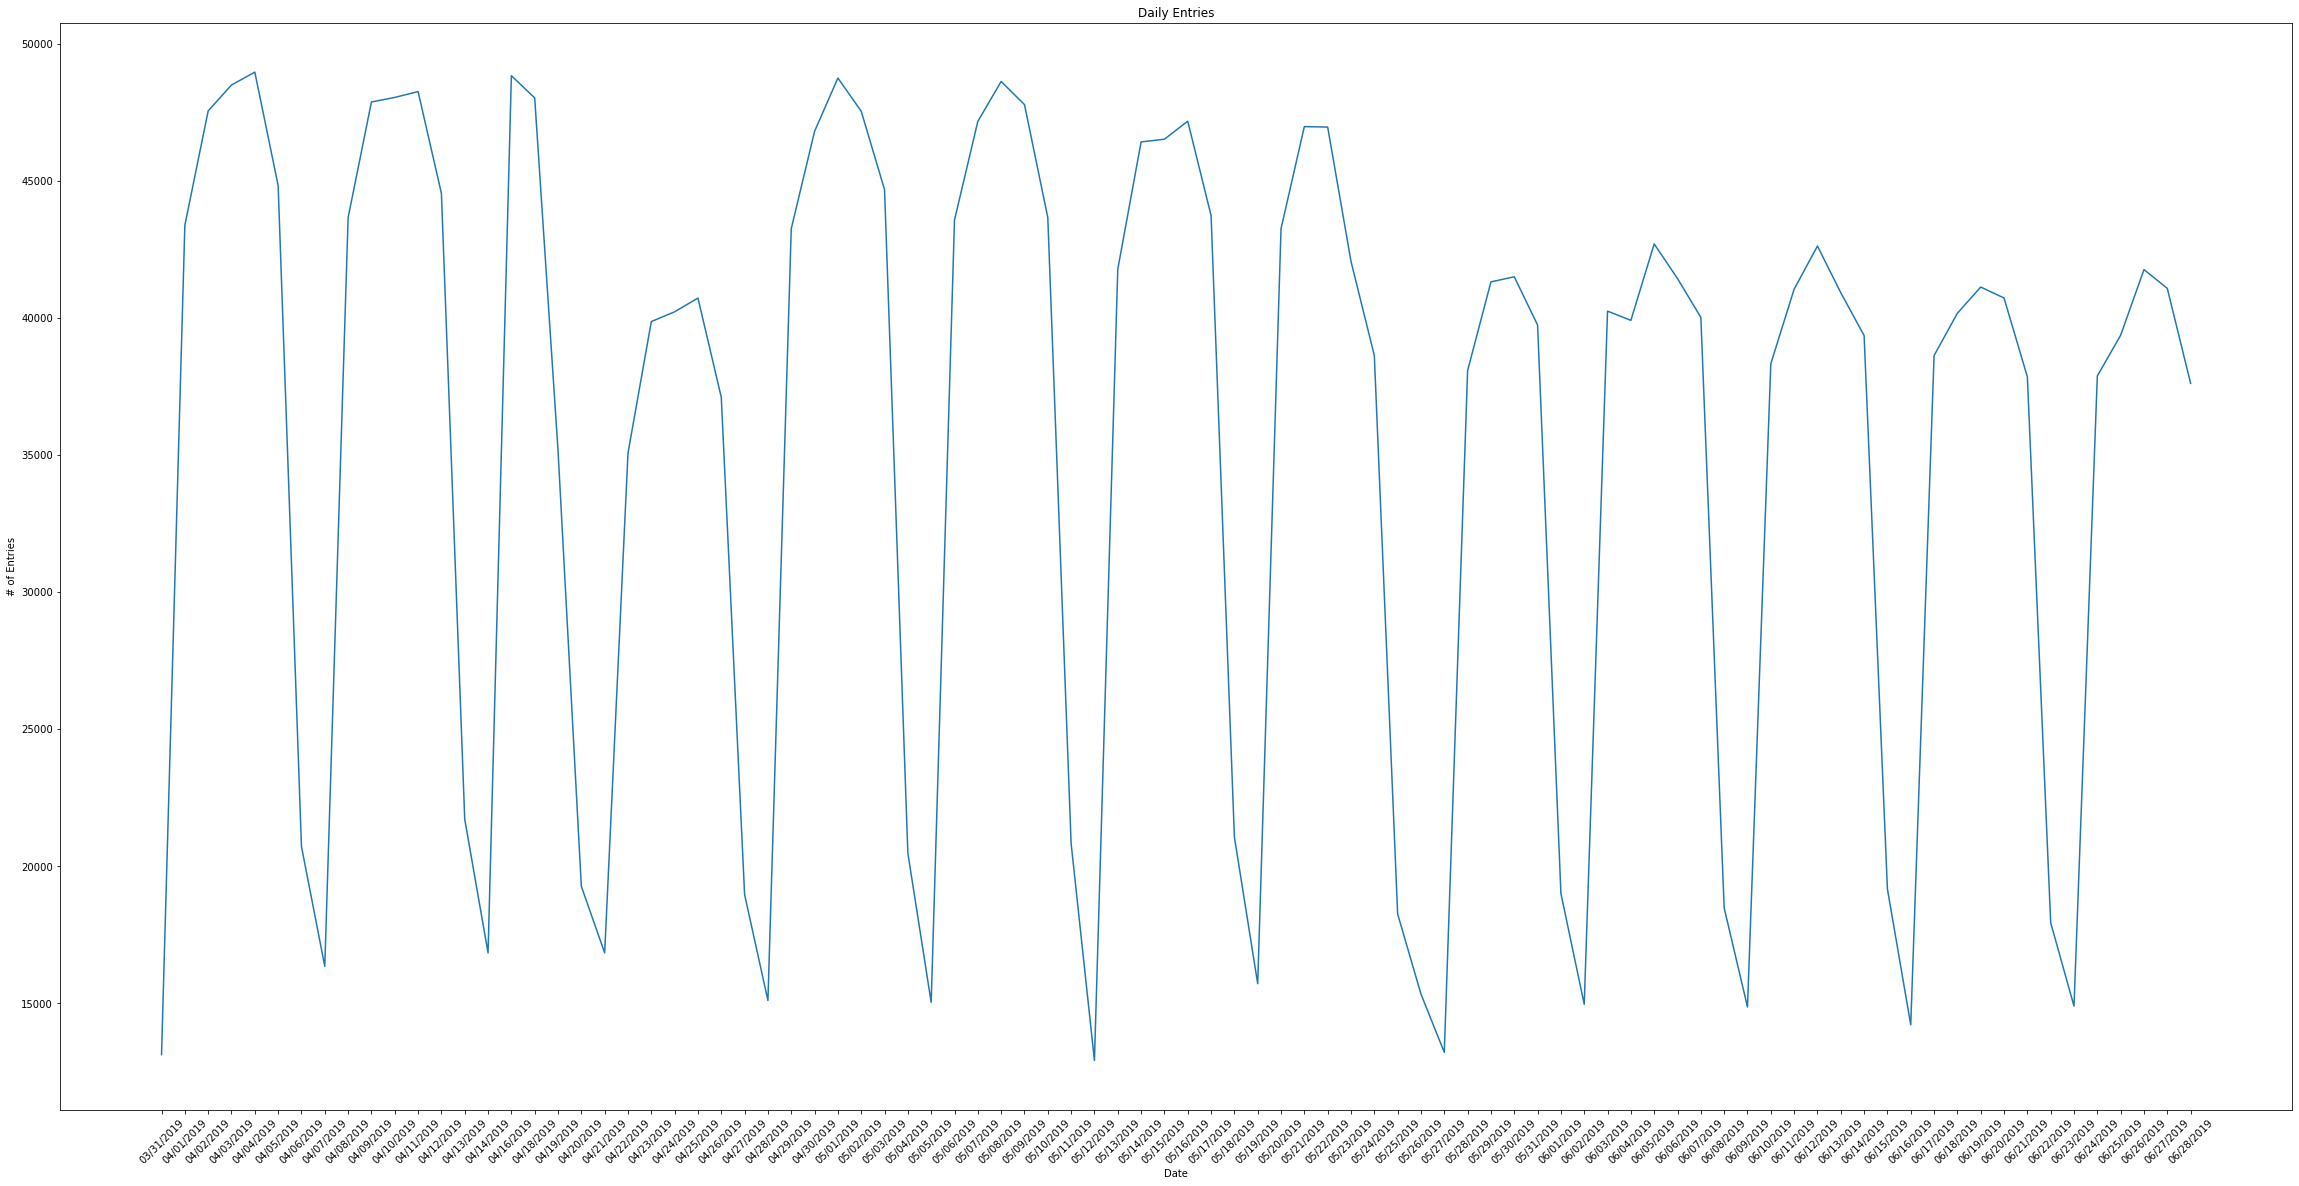

In [101]:
plt.figure(figsize=(40,20))
plt.plot(station_daily_J['DATE'], station_daily_J['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries')

In [102]:
station_daily_N =station_daily[(station_daily["STATION"] == "NOSTRAND AV")]

Text(0.5, 1.0, 'Daily Entries')

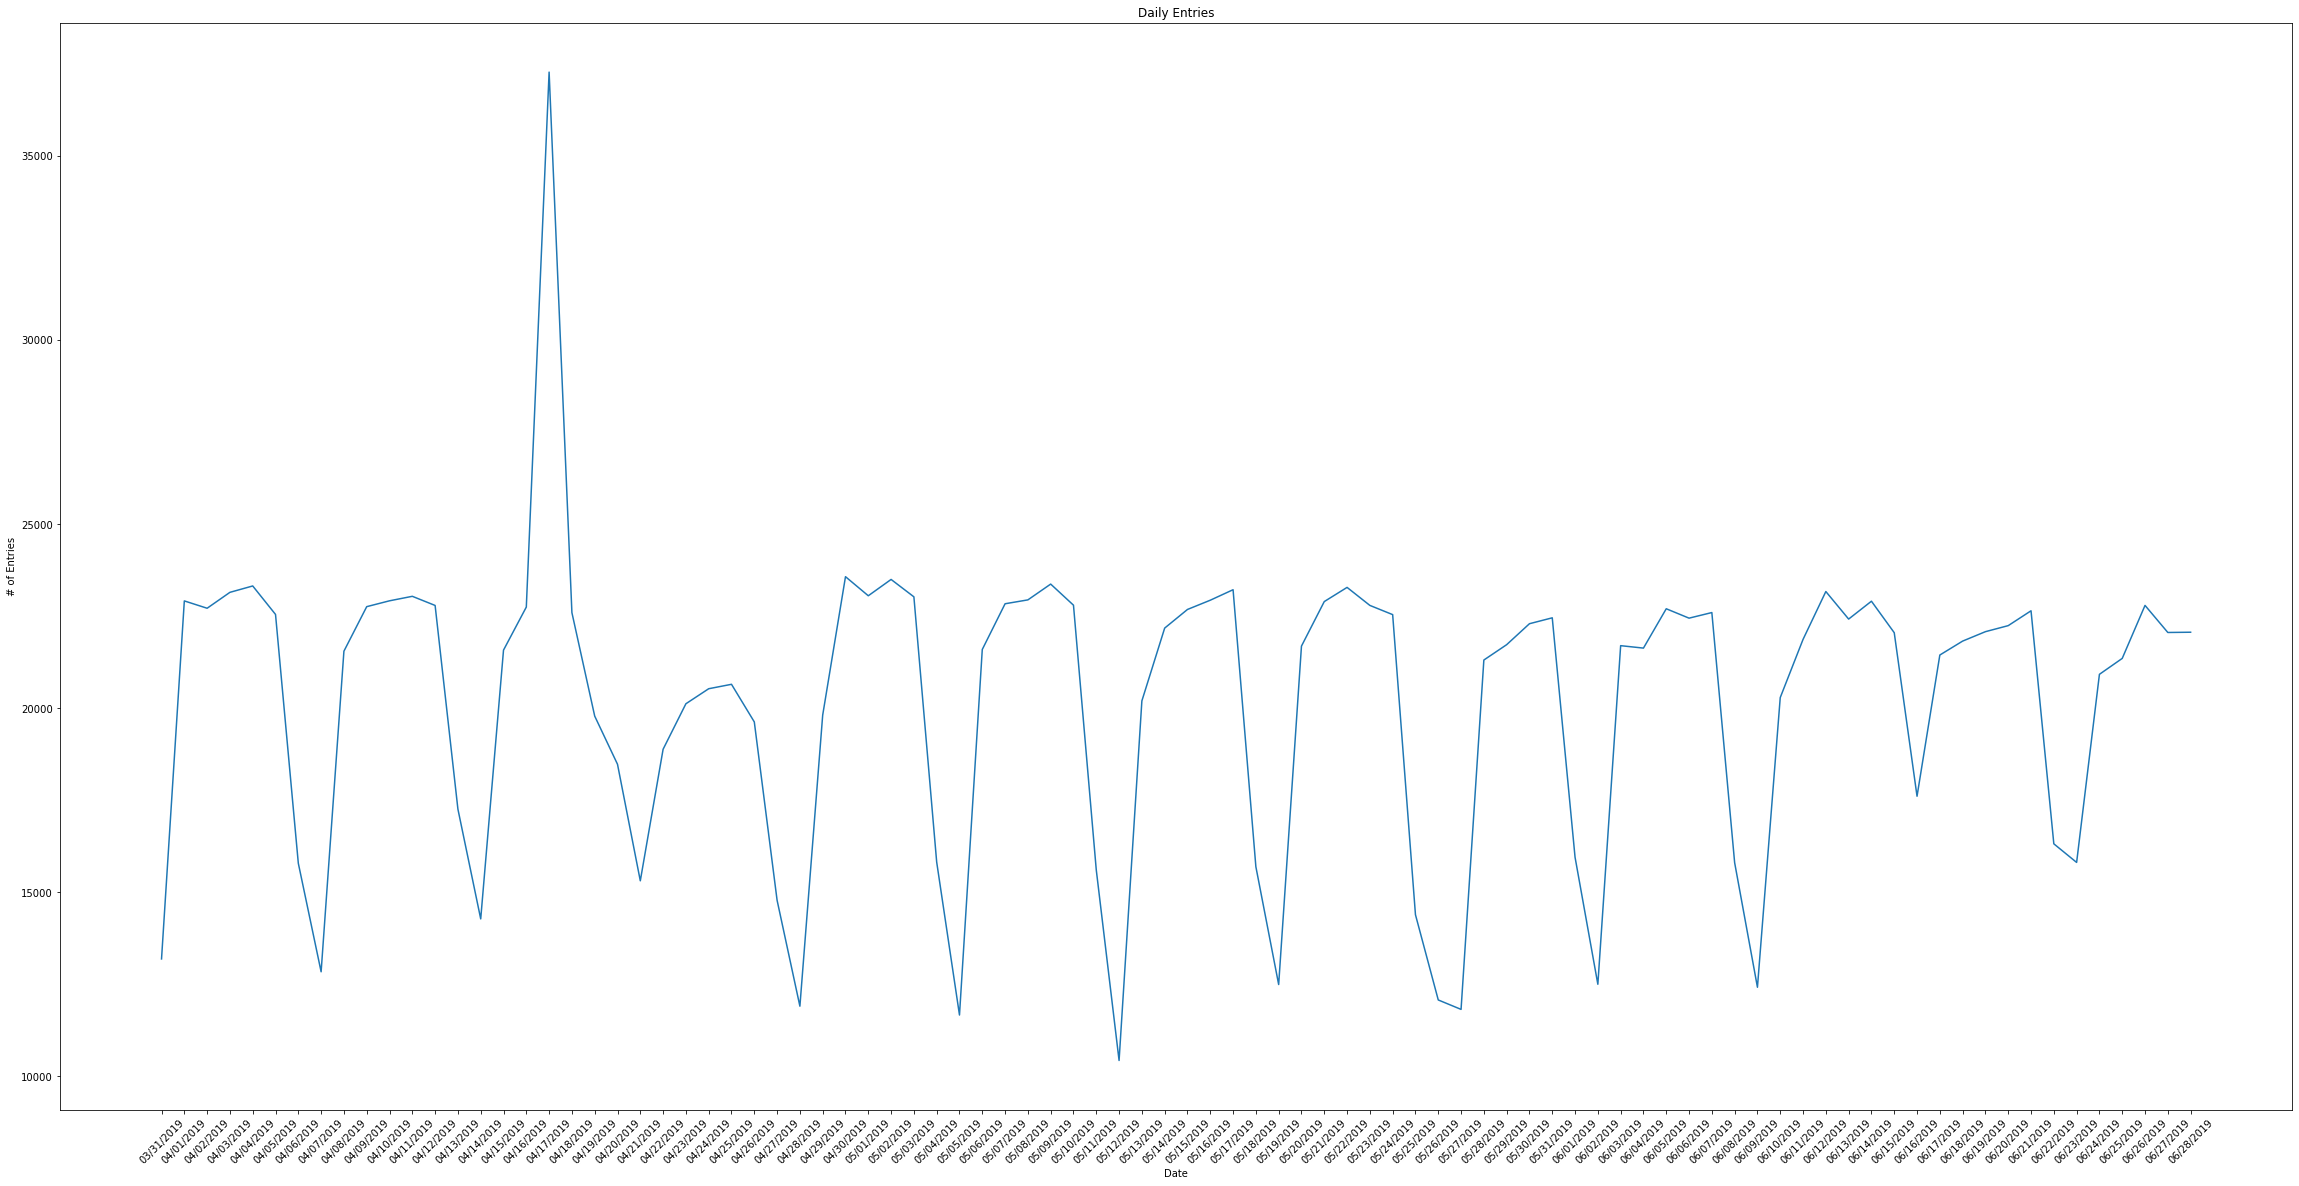

In [103]:
plt.figure(figsize=(40,20))
plt.plot(station_daily_N['DATE'], station_daily_N['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries')

In [105]:
station_daily_S =station_daily[(station_daily["STATION"] == "SUTTER AV")]

Text(0.5, 1.0, 'Daily Entries')

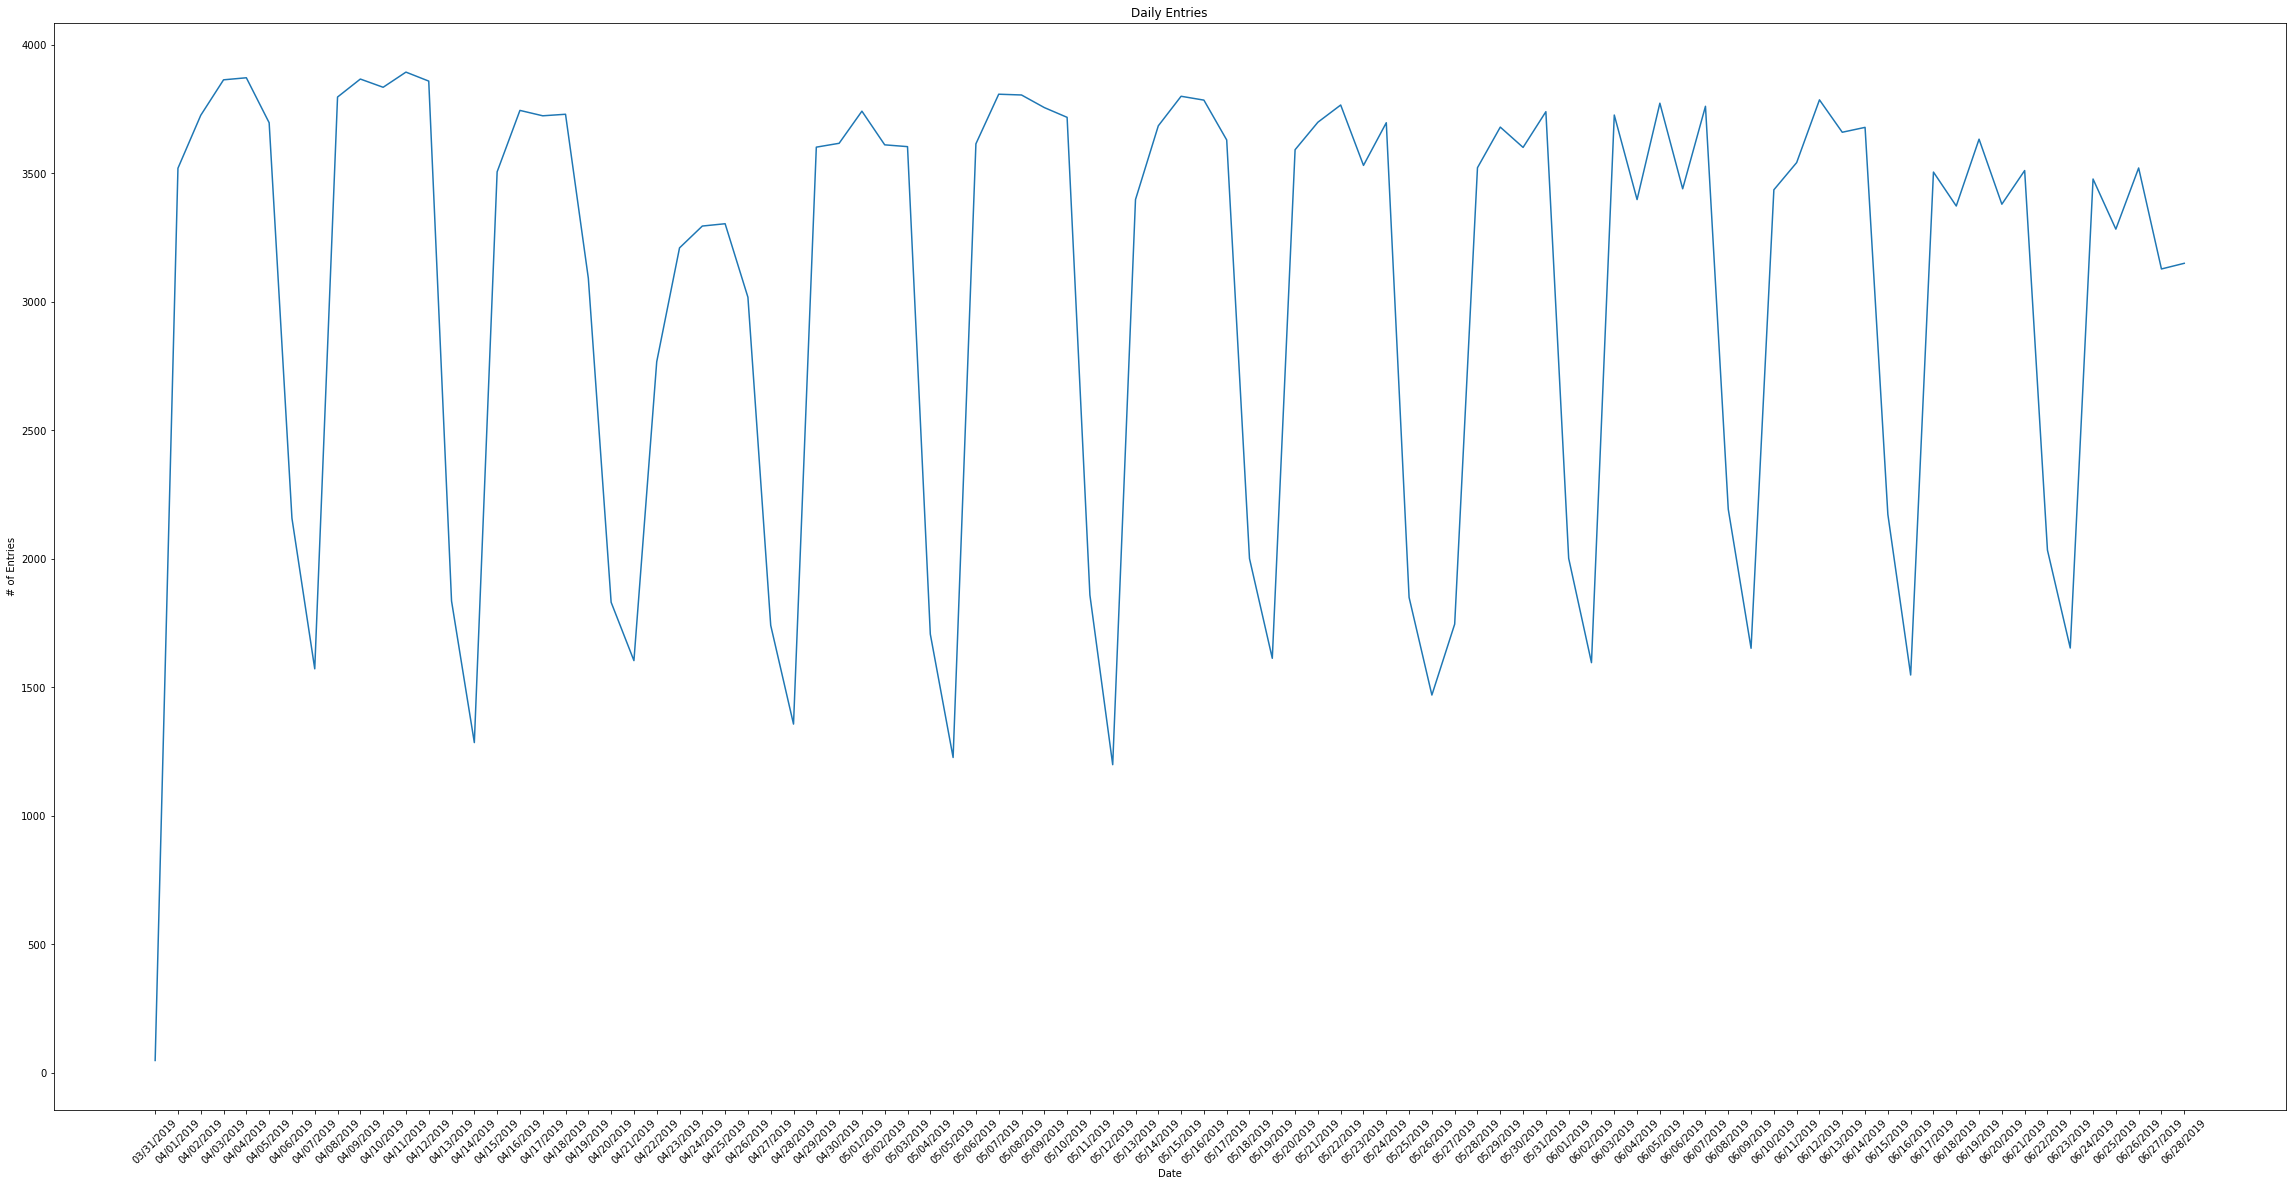

In [106]:
plt.figure(figsize=(40,20))
plt.plot(station_daily_S['DATE'], station_daily_S['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries')

In [107]:
station_daily_V =station_daily[(station_daily["STATION"] == "NEVINS ST")]

Text(0.5, 1.0, 'Daily Entries')

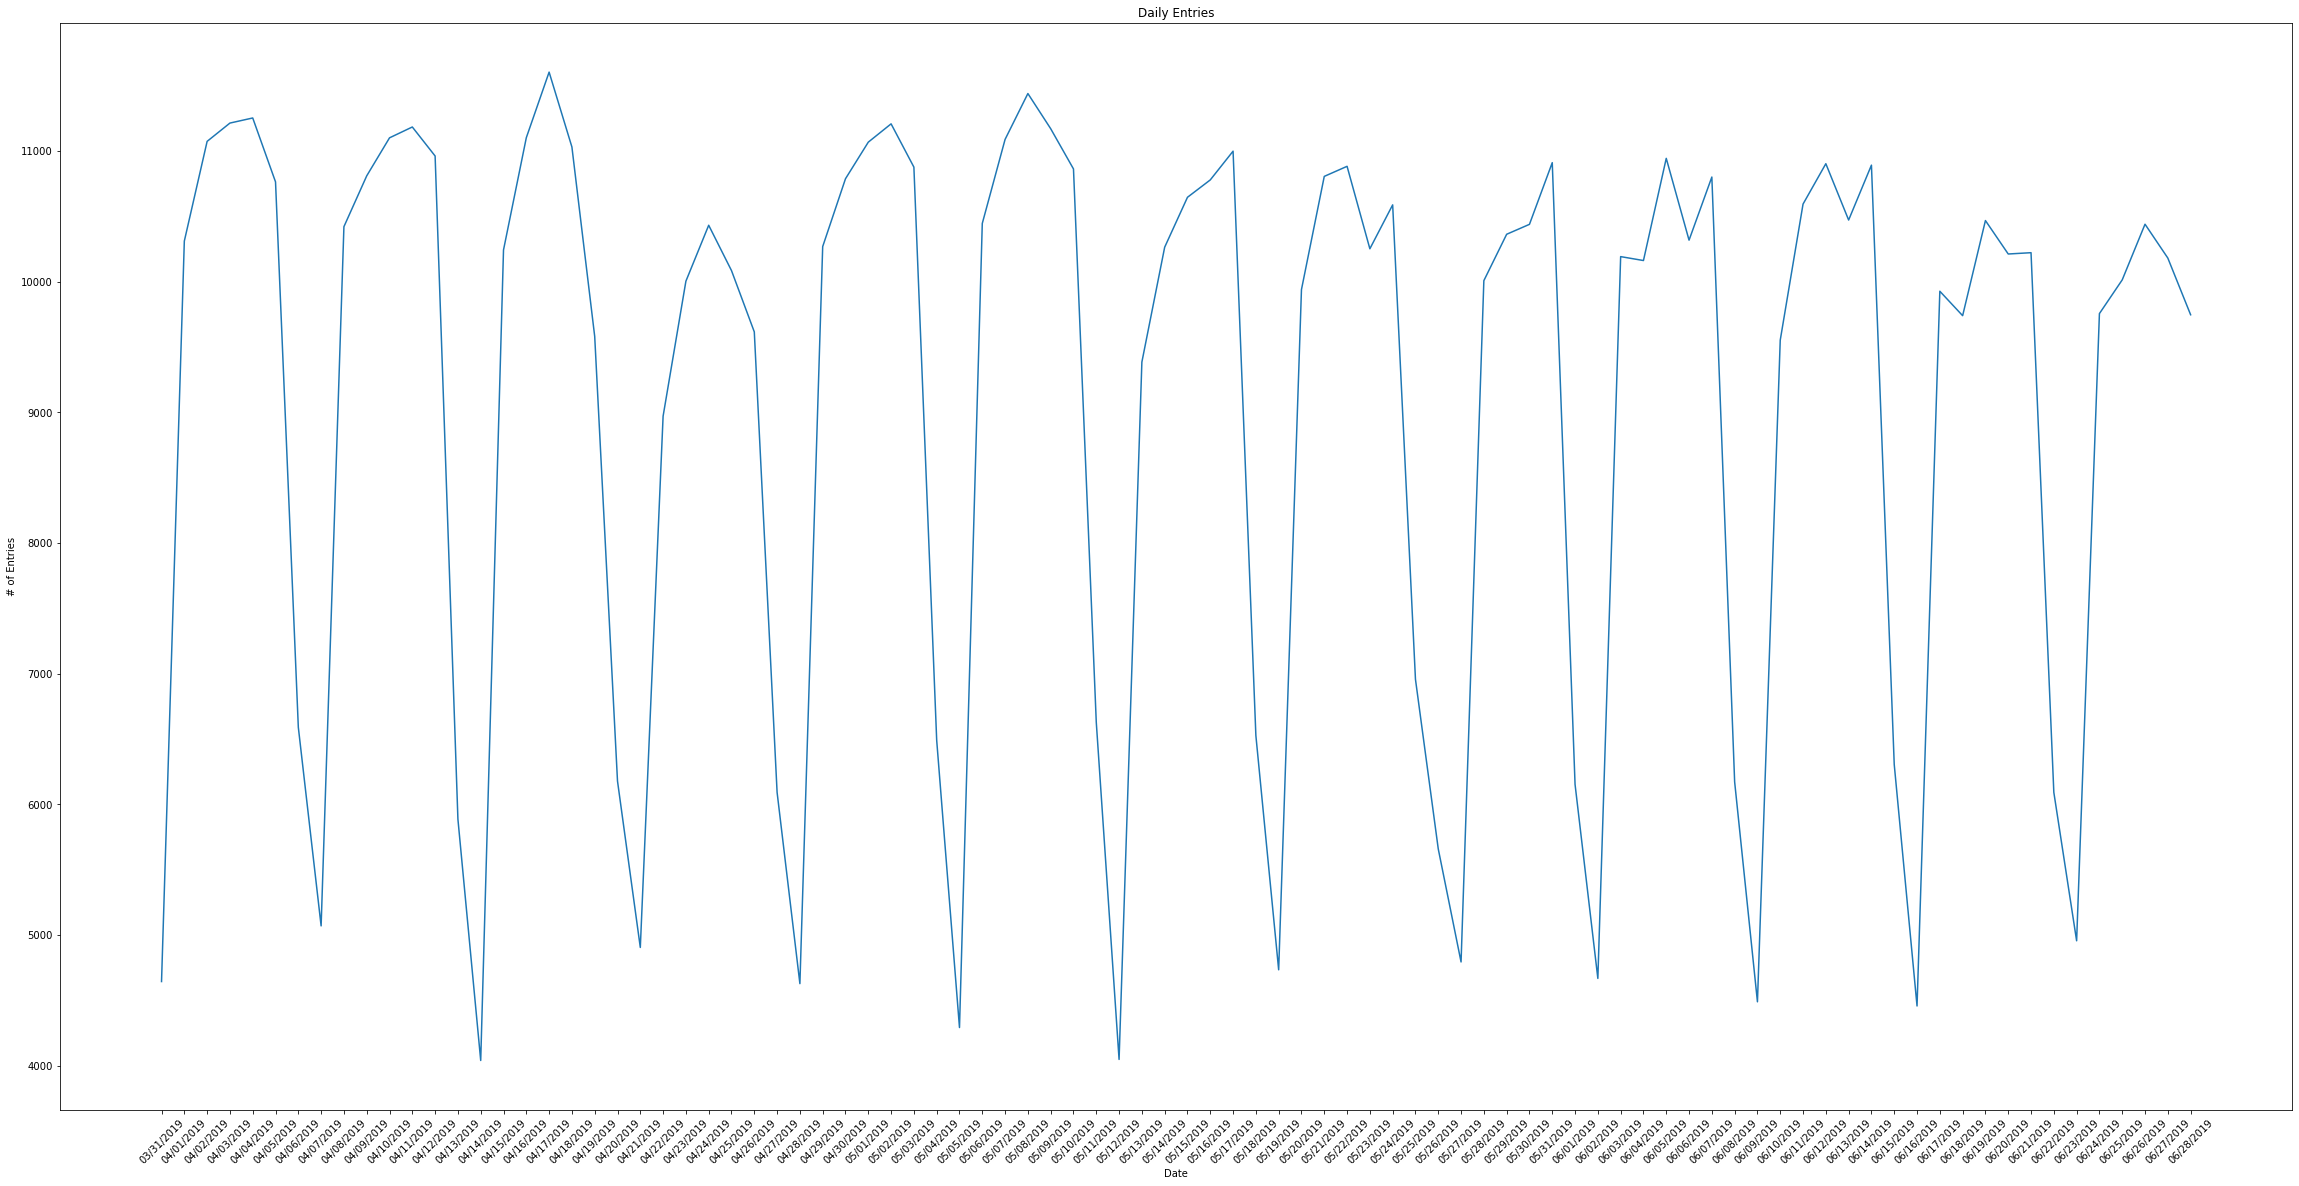

In [108]:
plt.figure(figsize=(40,20))
plt.plot(station_daily_V['DATE'], station_daily_V['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries')

In [109]:
station_daily_U =station_daily[(station_daily["STATION"] ==  "UTICA AV")]

Text(0.5, 1.0, 'Daily Entries')

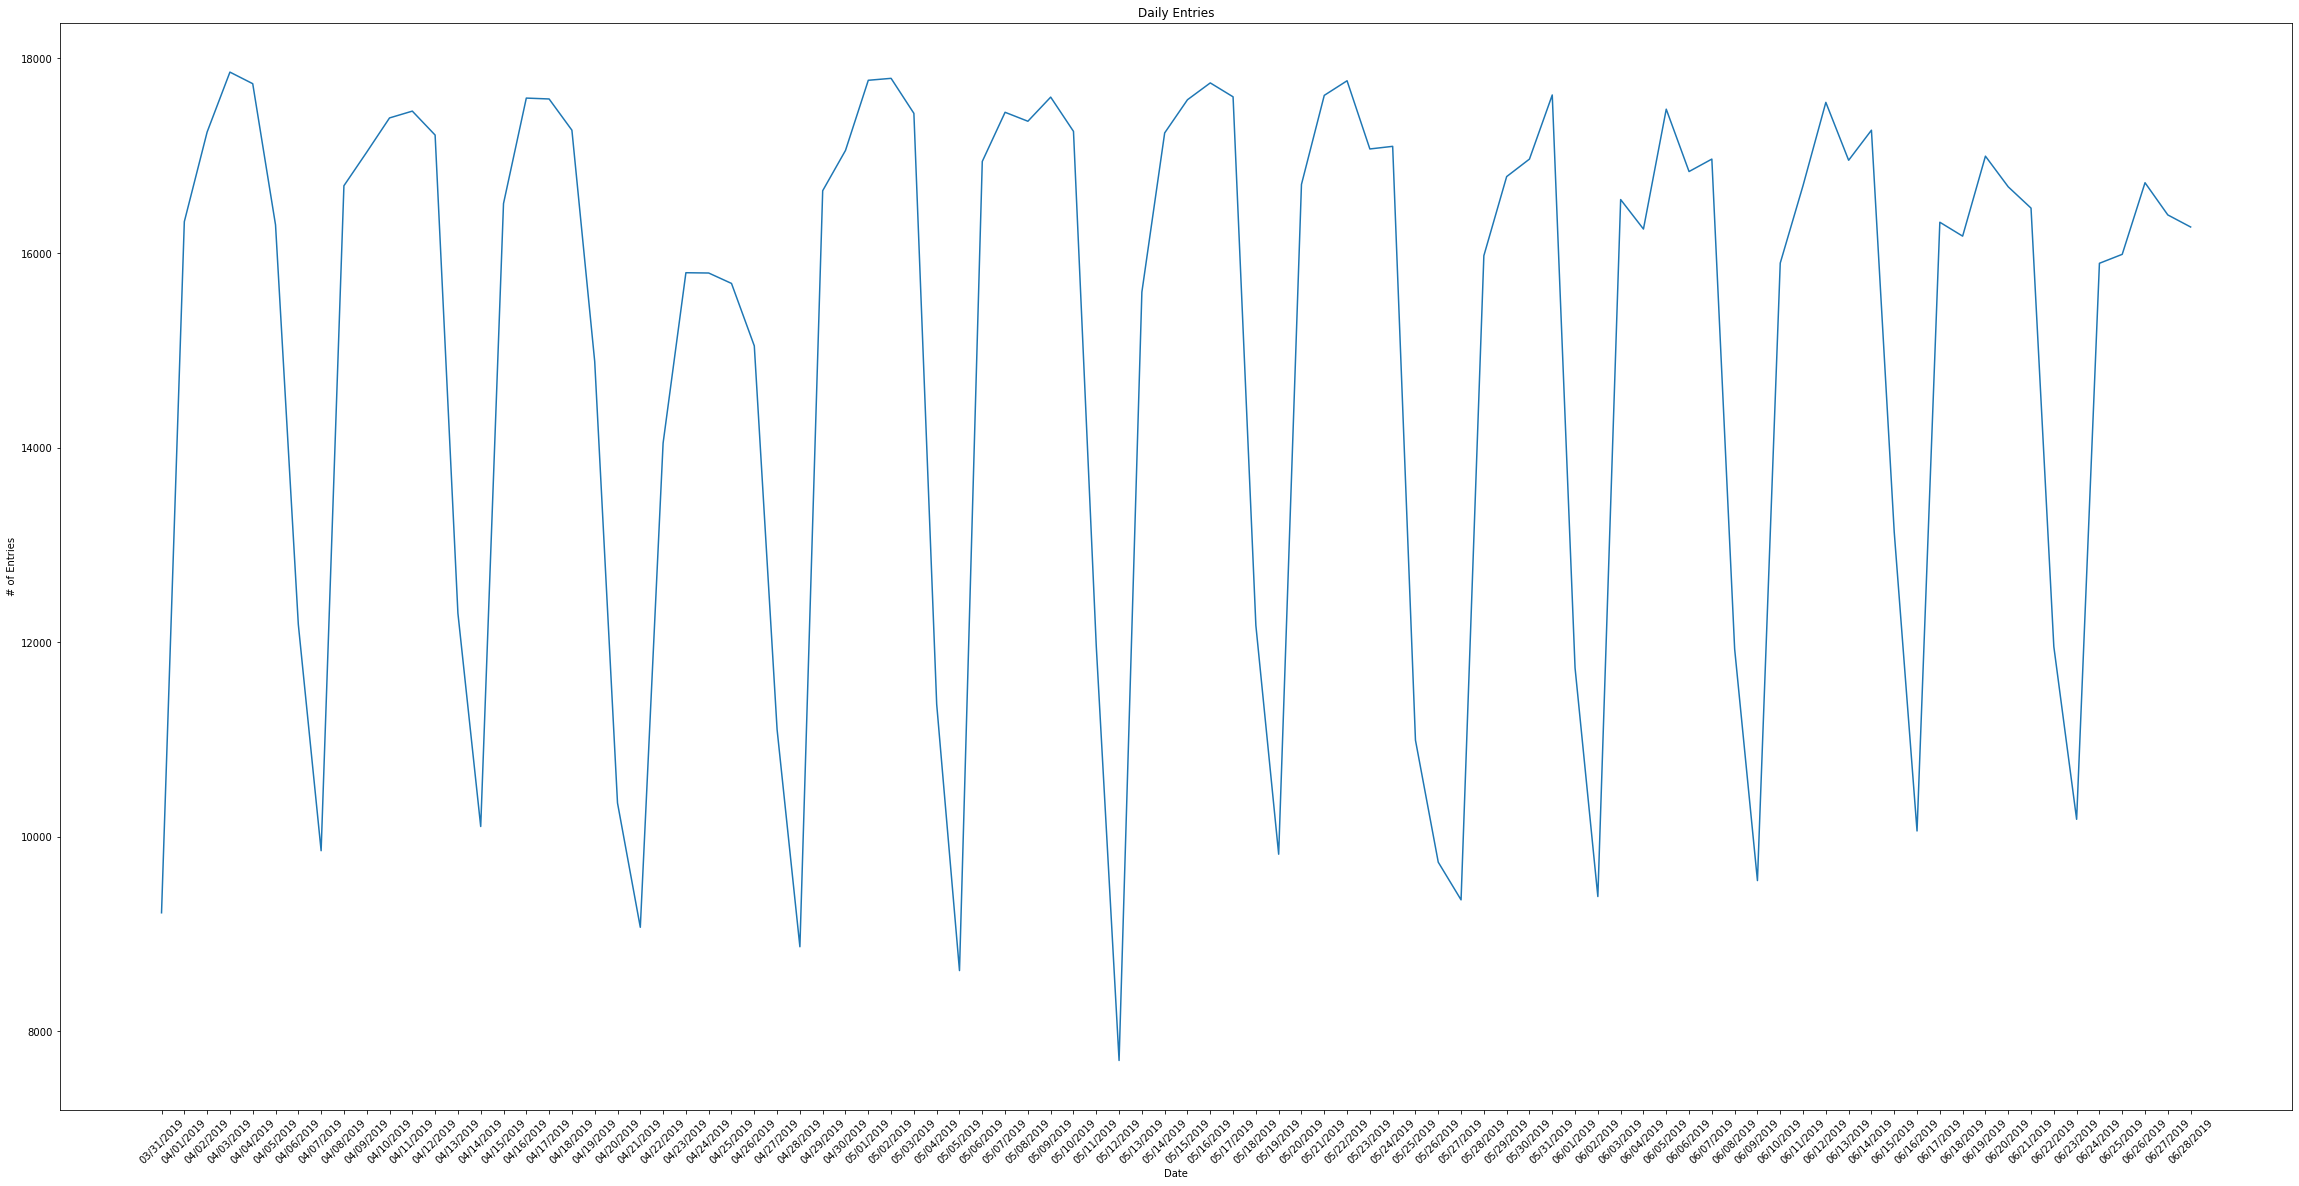

In [110]:
plt.figure(figsize=(40,20))
plt.plot(station_daily_U['DATE'], station_daily_U['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries')

Text(0.5, 1.0, 'Daily Entries')

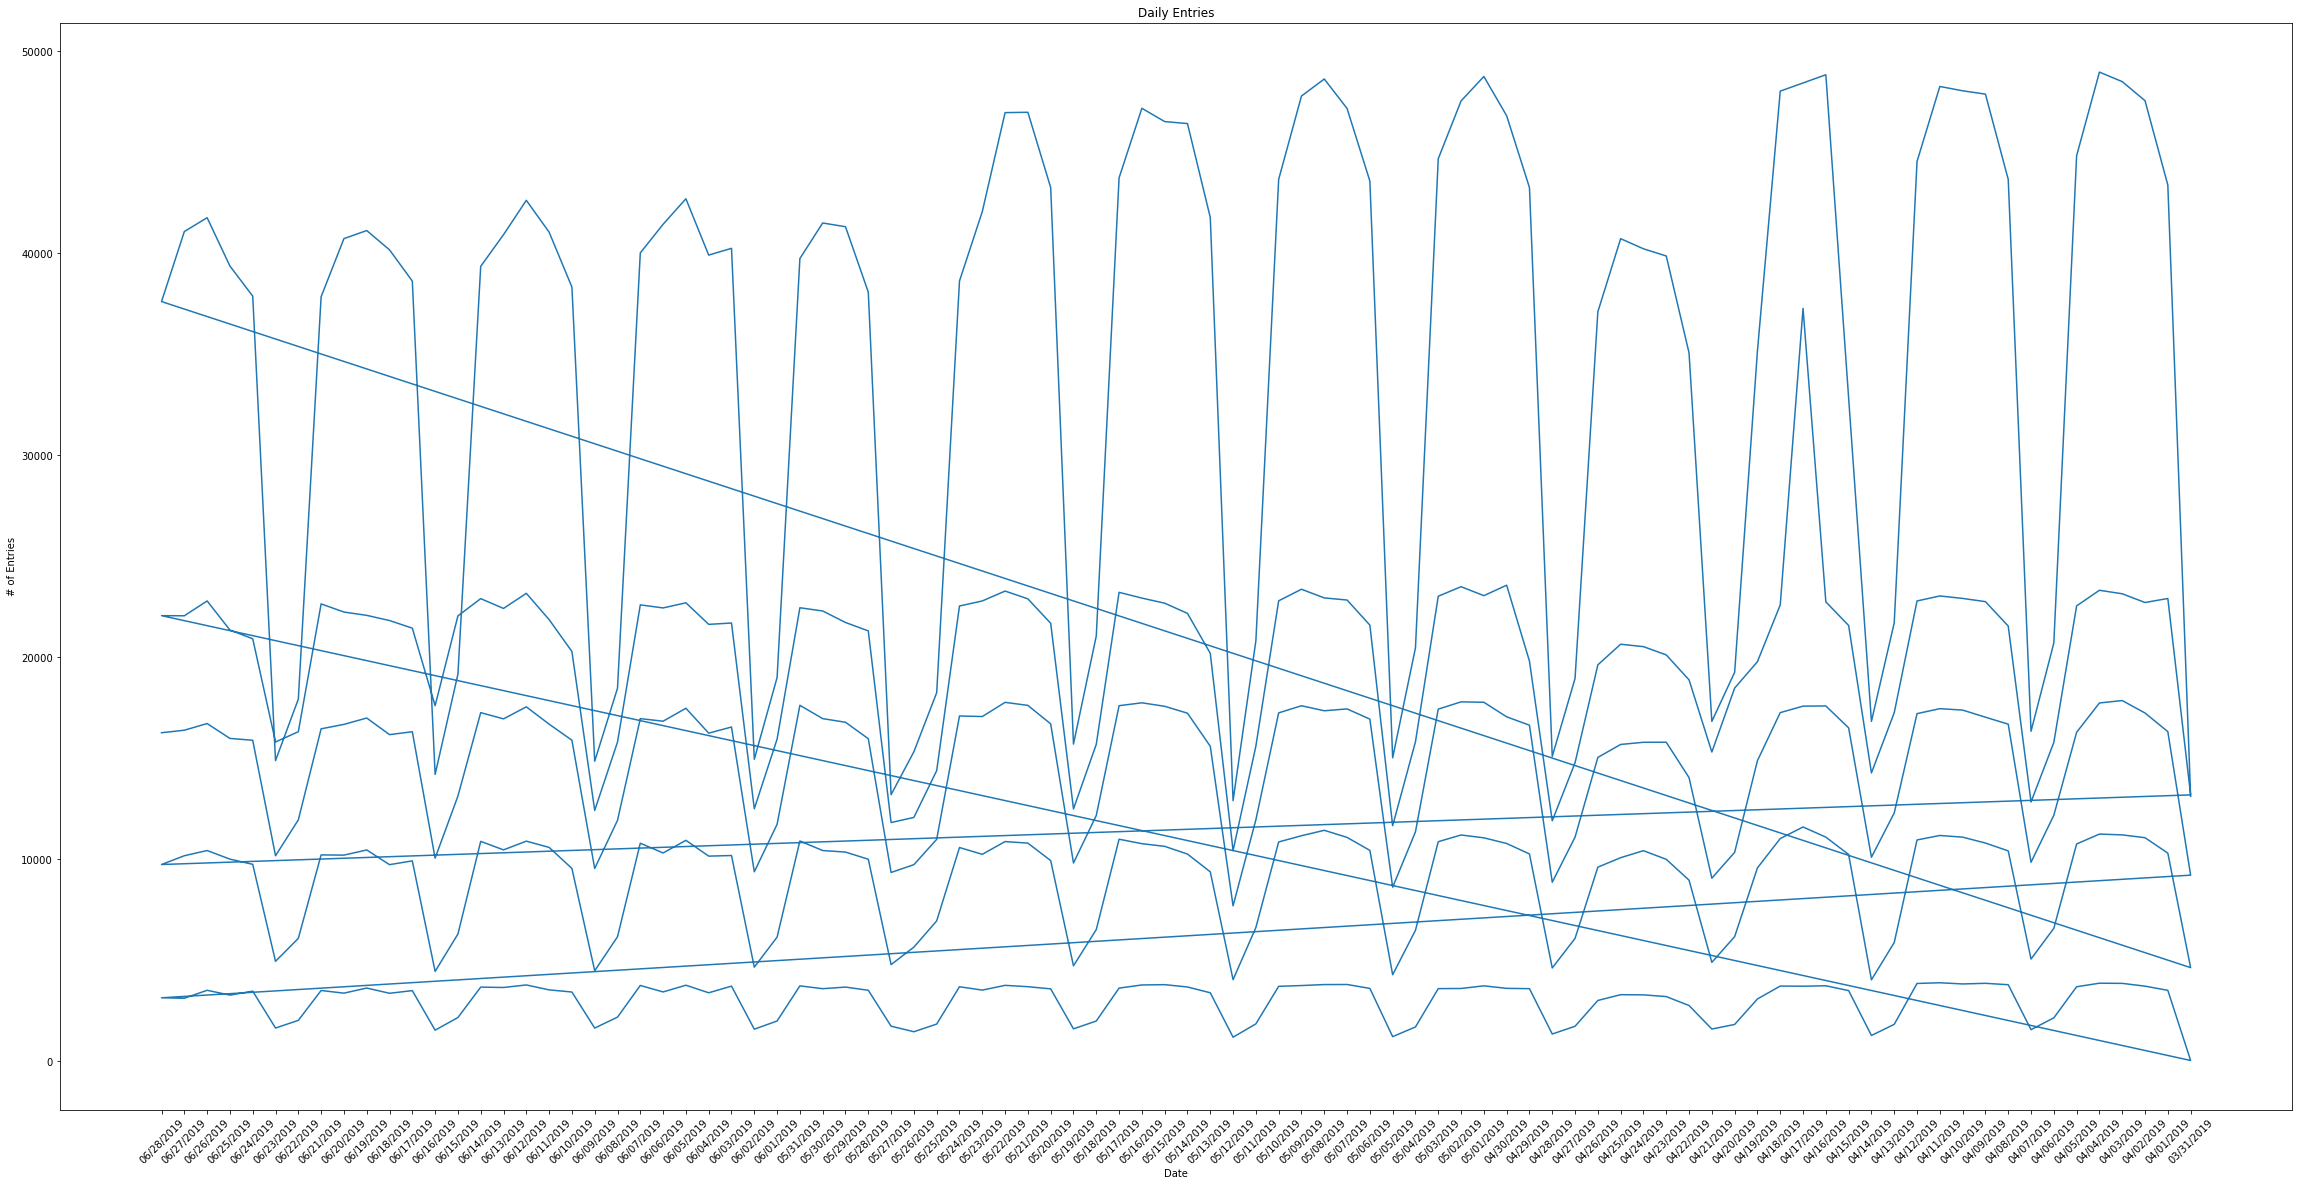

KeyError: 'WEEK_OF_YEAR'